## Data preparation

In [2]:
#Splitting von MERGED_DATA.csv in die jeweiligen Warengruppen
#Kann bei Bedarf in das Baseline-Modell Notebook kopiert

import pandas as pd
from datetime import datetime

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_filled.csv"
df_merged_data = pd.read_csv(merged_data_csv)

df = pd.DataFrame(df_merged_data)

# Fehlende Werte (NaN) durch 0 ersetzen
df_filled = df_merged_data.fillna(0)

#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Ursprüngliche DataFrames filtern nach Warengruppe
warengruppe_dataframes = {}
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    warengruppe_dataframes[var_name] = df_merged_data[
        (df_merged_data['Warengruppe'] == i) &
        (df_merged_data['Datum'] <= '2018-07-31')
    ]

# Daten bis 2019-07-31 unabhängig der Warengruppe hinzufügen
new_data = df_merged_data[
    (df_merged_data['Datum'] > '2018-07-31') &
    (df_merged_data['Datum'] <= '2019-08-31')
]

for var_name, df in warengruppe_dataframes.items():
    updated_df = pd.concat([df, new_data], ignore_index=True)
    globals()[var_name] = updated_df



# Ergebnisse ausgeben
print("df_Brot_W1:")
print(df_Brot_W1.tail()) #Luisa

print("df_Broetchen_W2:")
print(df_Broetchen_W2.tail()) #Luisa

print("df_Crossaint_W3:")
print(df_Crossaint_W3.tail()) #Nina

print("df_Konditorei_W4:")
print(df_Konditorei_W4.tail()) #Wiebke

print("df_Kuchen_W5:")
print(df_Kuchen_W5.tail()) #Nina

print("df_Saisonbrot_W6:")
print(df_Saisonbrot_W6.tail()) #Wiebke



df_Brot_W1:
           Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
2179  2019-07-27             0.0          1                0      0   
2180  2019-07-28             0.0          0                0      0   
2181  2019-07-29             0.0          0                0      0   
2182  2019-07-30             0.0          0                0      0   
2183  2019-07-31             0.0          0                0      0   

     Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
2179             0               0.0     23.5375    7.0     Sommer  ...   
2180             0               0.0     23.3500    7.0     Sommer  ...   
2181             0               0.0     25.2500    7.0     Sommer  ...   
2182             0               0.0     20.7375    7.0     Sommer  ...   
2183             0               0.0     20.4500    7.0     Sommer  ...   

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
2179     0.0      0.0        0.0      


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
        Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
0  2013-07-01            1.53          0                0      0   
1  2013-07-02            1.53          0                0      0   
2  2013-07-03            1.53          0                0      0   
3  2013-07-04            1.53          0                0      0   
4  2013-07-05            1.53          0                0      0   

  Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  Monday  \
0     1.576.718           419.447     17.8375    7.0     Sommer  ...     1.0   
1     1.576.718           419.447     17.3125    7.0     Sommer  ...     0.0   
2     1.576.718           419.447     21.0750    7.0     Sommer  ...     0.0   
3     1.576.718           419.447     18.8500    7.0     Sommer  ...     0.0   
4   

/tmp/ipykernel_13253/3439602479.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


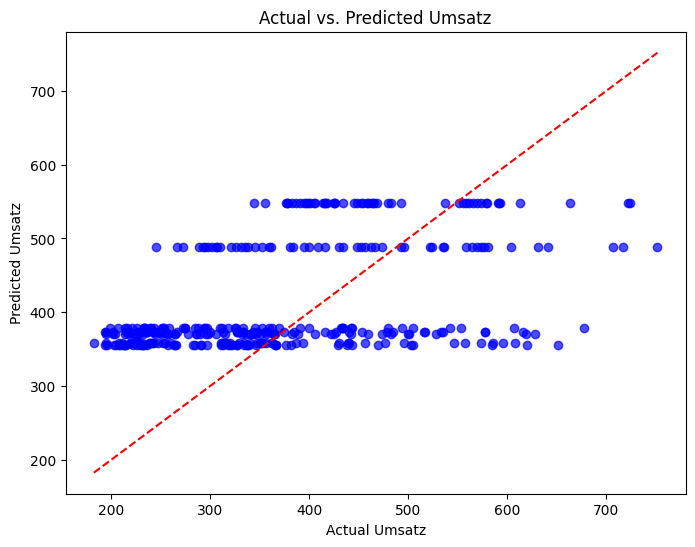

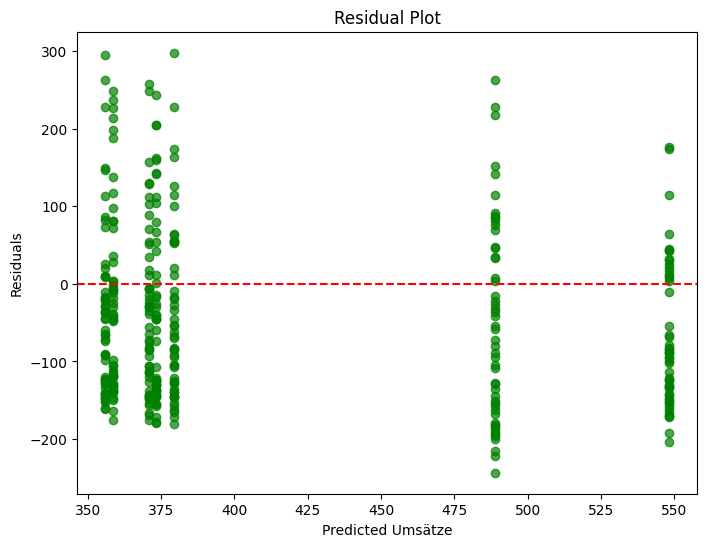

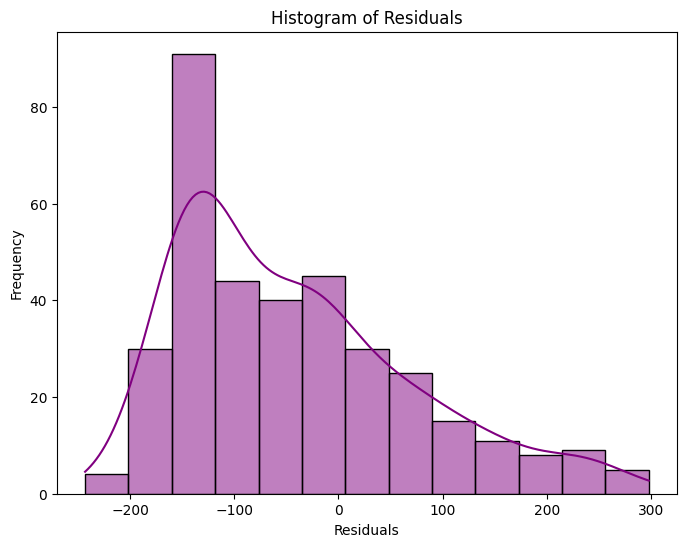

/tmp/ipykernel_13253/3439602479.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


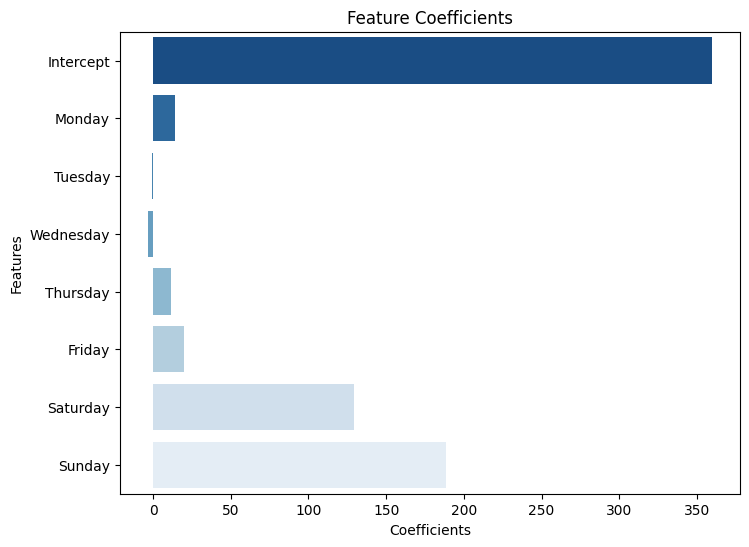

In [3]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
data=df_Broetchen_W2

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Monday',
            'Tuesday',
            'Wednesday',
            'Thursday',
            'Friday',
            'Saturday',
            'Sunday'
            ]
X = data[features] #target variable: Umsatz

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']




# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
        Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
0  2013-07-01            1.53          0                0      0   
1  2013-07-02            1.53          0                0      0   
2  2013-07-03            1.53          0                0      0   
3  2013-07-04            1.53          0                0      0   
4  2013-07-05            1.53          0                0      0   

  Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  Monday  \
0     1.576.718           419.447     17.8375    7.0     Sommer  ...     1.0   
1     1.576.718           419.447     17.3125    7.0     Sommer  ...     0.0   
2     1.576.718           419.447     21.0750    7.0     Sommer  ...     0.0   
3     1.576.718           419.447     18.8500    7.0     Sommer  ...     0.0   
4   

/tmp/ipykernel_13253/1217042024.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


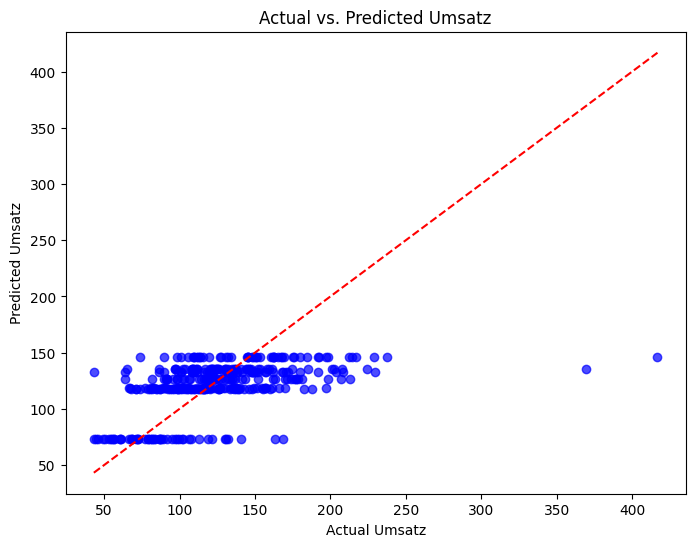

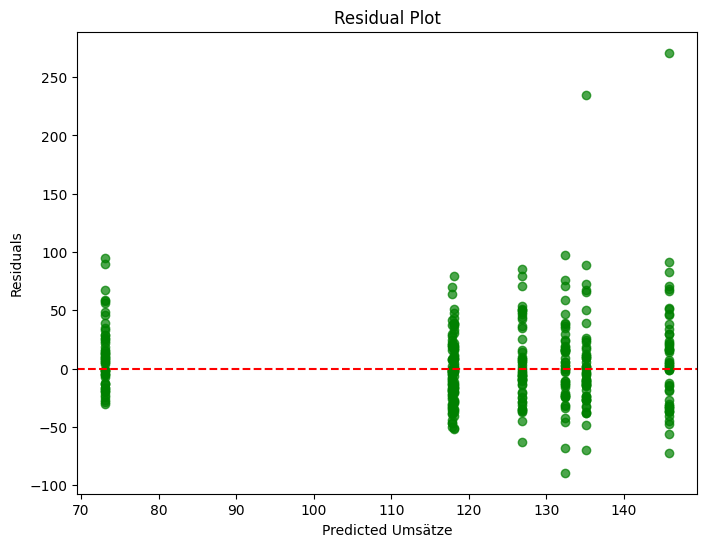

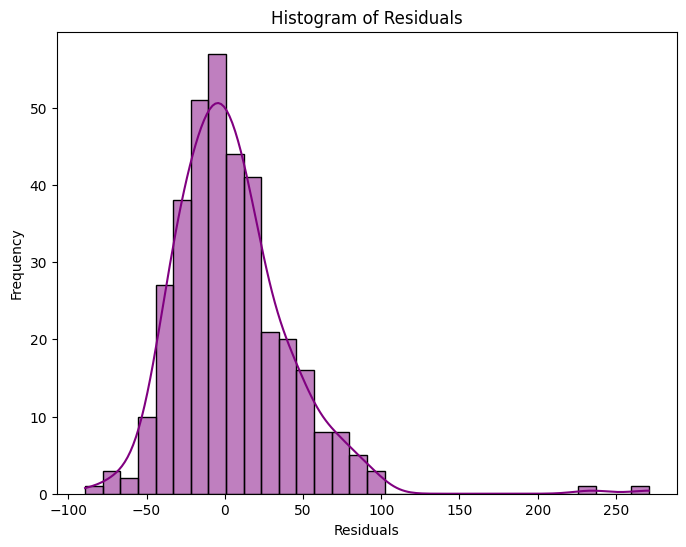

/tmp/ipykernel_13253/1217042024.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


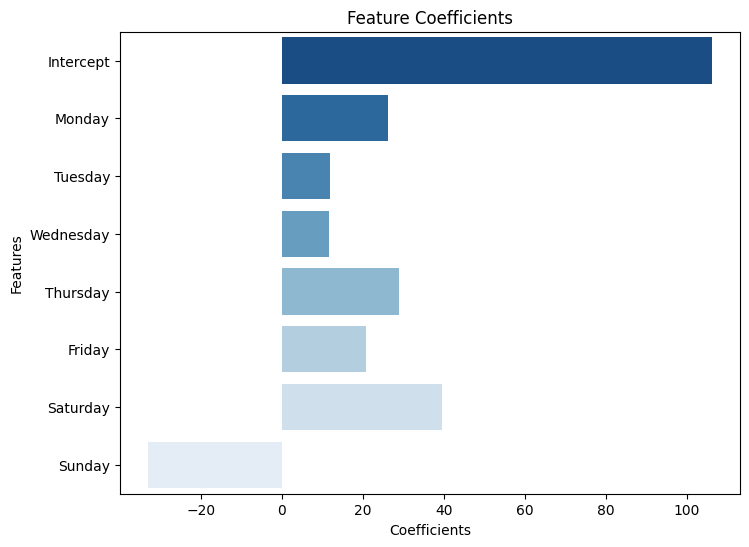

In [4]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
data=df_Brot_W1

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Monday',
            'Tuesday',
            'Wednesday',
            'Thursday',
            'Friday',
            'Saturday',
            'Sunday'
            ]
X = data[features] #target variable: Umsatz

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']




# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

/tmp/ipykernel_13253/3014237650.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


Predictions for test data: [200.03819502 226.85012326 226.85012326 226.85012326 226.85012326]
Mean Absolute Error (MAE): 103.88
Mean Squared Error (MSE): 16843.62
Mean Absolute Percentage Error (MAPE): 80.89%


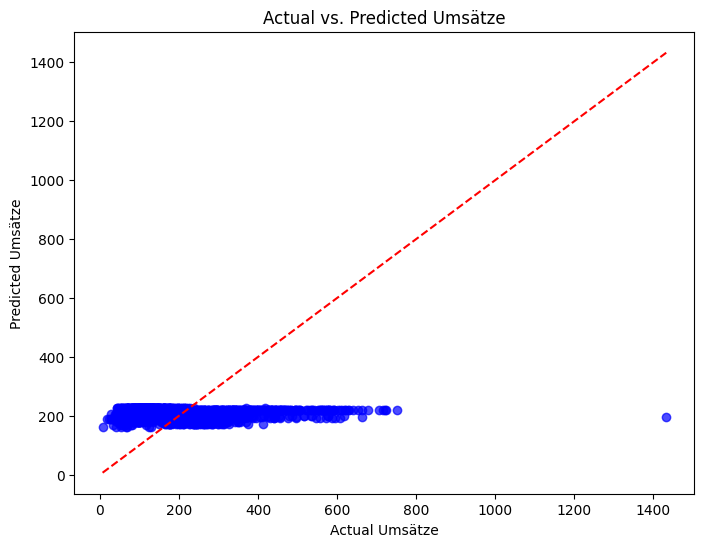

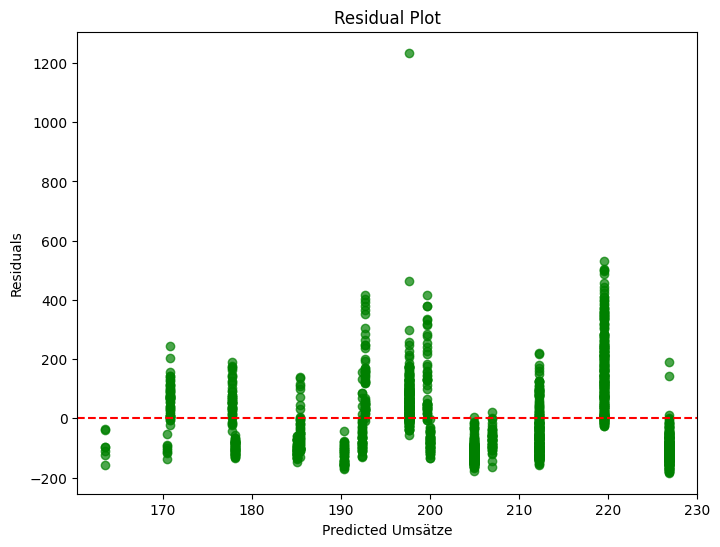

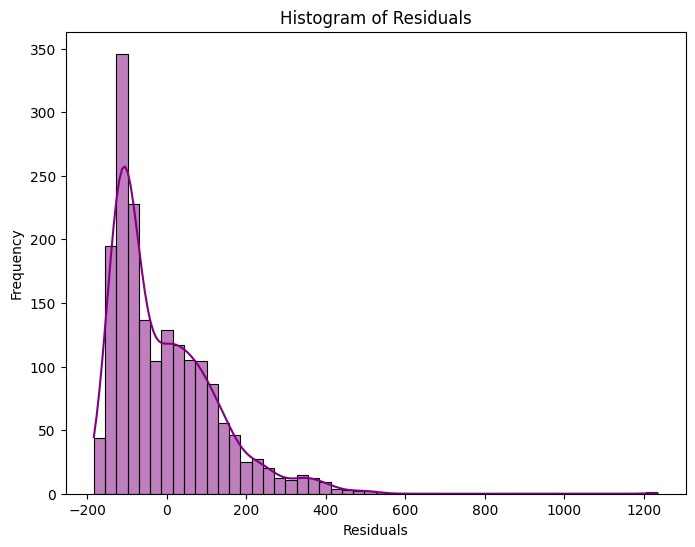

/tmp/ipykernel_13253/3014237650.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


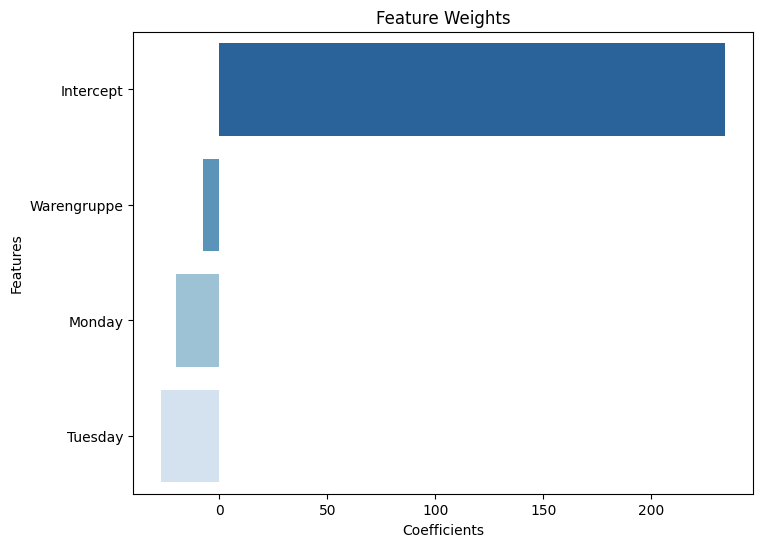

In [5]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Load the dataset

data = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/umsatzdaten_codiert.csv")

# Select features and target variable
# Features include 'Warengruppe', 'Monday', 'Tuesday'
features = ['Warengruppe', 'Monday', 'Tuesday']
X = data[features]
y = data['Umsatz']  # Target variable: Umsatz

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsätze")
plt.ylabel("Predicted Umsätze")
plt.title("Actual vs. Predicted Umsätze")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


## Predictions 2018-2019

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics


# Load the dataset 
data=df_Broetchen_W2

# Display the first few rows of the dataset for inspection
print(data.tail())

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Sommer',
            'Winter',
            'Frühling',
            'Herbst',
            'Temp_average',
            'Temp_warm',
            'Temp_cold',
            'Feiertage']
X = data[features] #target variable: Umsatz
y = data['Umsatz']  # Target variable: house price

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

print(predictions)


# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


          Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
2179 2019-07-27             0.0          1                0      0   
2180 2019-07-28             0.0          0                0      0   
2181 2019-07-29             0.0          0                0      0   
2182 2019-07-30             0.0          0                0      0   
2183 2019-07-31             0.0          0                0      0   

     Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
2179             0               0.0     23.5375    7.0     Sommer  ...   
2180             0               0.0     23.3500    7.0     Sommer  ...   
2181             0               0.0     25.2500    7.0     Sommer  ...   
2182             0               0.0     20.7375    7.0     Sommer  ...   
2183             0               0.0     20.4500    7.0     Sommer  ...   

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
2179     0.0      0.0        0.0       0.0     0.0      

## Formatting predictions for submission

In [8]:
from datetime import datetime
import numpy as np

#Datum zu predicted Umsatzdaten hinzufügen

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)


          Datum      Umsatz
0    2018-08-01  134.919431
1    2018-08-02  134.919431
2    2018-08-03  134.919431
3    2018-08-04  134.919431
4    2018-08-05  137.623620
..          ...         ...
359  2019-07-26  134.919431
360  2019-07-27  134.919431
361  2019-07-28  137.623620
362  2019-07-29  134.919431
363  2019-07-30  137.623620

[364 rows x 2 columns]


In [9]:
#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe2_df = df_test_csv[df_test_csv["Warengruppe"] == 2].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe2_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/W2_Broetchen_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

# Umsatzdaten der gefilterten Zeilen hinzufügen
#warengruppe1_df["Umsatz"] = predictions

# 5. Original-DataFrame mit Umsatzdaten für Warengruppe 1 mergen
# Zeilen anderer Warengruppen werden mit Umsatz = 0 gefüllt
#merged_df = df_test_csv.merge(warengruppe1_df[["id", "Umsatz"]], on="id", how="left")
#merged_df["Umsatz"] = merged_df["Umsatz"].fillna(0)

#  6. Ergebnis speichern oder anzeigen
#merged_df.to_csv("merged_umsatz.csv", index=False)  # Speichern in eine neue CSV-Datei
#print(merged_df)

          id       Datum  Warengruppe      Umsatz
0    1808012  2018-08-01            2  134.919431
1    1808022  2018-08-02            2  134.919431
2    1808032  2018-08-03            2  134.919431
3    1808042  2018-08-04            2  134.919431
4    1808052  2018-08-05            2  137.623620
..       ...         ...          ...         ...
350  1907262  2019-07-26            2  134.919431
351  1907272  2019-07-27            2  134.919431
352  1907282  2019-07-28            2  137.623620
353  1907292  2019-07-29            2  134.919431
354  1907302  2019-07-30            2  137.623620

[355 rows x 4 columns]
